# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Muhammad Rifva Maulana
- **Email:** maulanarifva@gmail.com
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan penggunaan sepeda selama 1 tahun ?
- Apa penyebab penggunaan sepeda naik dan turun ?

## **Import Semua Packages/Library yang Digunakan**

- **Install Patool**




In [7]:
#Tools Untuk Unzip File
!pip install patool

- **Import Library**

In [16]:
#import library yang dibutuhkkan
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import patoolib

- **Unzip File**

In [10]:
patoolib.extract_archive("Bike-sharing-dataset.zip")

INFO patool: Extracting Bike-sharing-dataset.zip ...
INFO:patool:Extracting Bike-sharing-dataset.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_r4y5c_py -- Bike-sharing-dataset.zip
INFO:patool:running /usr/bin/7z x -o./Unpack_r4y5c_py -- Bike-sharing-dataset.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... Bike-sharing-dataset.zip extracted to `Bike-sharing-dataset' (multiple files in root).
INFO:patool:... Bike-sharing-dataset.zip extracted to `Bike-sharing-dataset' (multiple files in root).


'Bike-sharing-dataset'

## **Data Wrangling**

### **Gathering Data**

Disini saya tidak menggunakan dua file karena tidak akan saya gunakan, 1 data sudah cukup relevan untuk pertanyaan bisnis. Dikarenakan data day pun memiliki kesamaan 90% dengan data hour.

- **Ambil & Baca data file csv**

In [79]:
#File day.csv
day=pd.read_csv('/content/Bike-sharing-dataset/day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

### Menganalisis data yang kotor

- Analisis file day

In [80]:
#cek tipe data
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [81]:
#cek miss value
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [82]:
#cek data duplikat
day.duplicated().sum()

0

In [83]:
#cek outlier
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

- Mengganti Tipe data yang salah di dtday pada file day

In [88]:
#Ubah tipe data berdasarkan value column ke datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  day[column] = pd.to_datetime(day[column])

In [89]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

- Menghapus kolom yang tidak diperlukan

In [90]:
drop_col = ['instant', 'windspeed', 'hum', 'temp', 'atemp']

for i in day.columns:
  if i in drop_col:
    day.drop(labels=i, axis=1, inplace=True)

day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


Saya menghapus beberapa kolom yang menurut saya tidak dibbutuhkan dan juga rancu untuk saya analisis karena kurang relevan dengan pertanyaan.

- Mengubah Judul Kolom

In [91]:
day.rename(columns={
    'dteday': 'Tanggal',
    'yr': 'Tahun',
    'mnth': 'Bulan',
    'weathersit': 'Cuaca',
    'cnt': 'Ttl_Penyewa',
    'season' : 'Musim',
    'casual' : 'Reguler',
    'registered': 'Member'
}, inplace=True)

day.head()

,Tanggal,Musim,Tahun,Bulan,holiday,weekday,workingday,Cuaca,Reguler,Member,Ttl_Penyewa
0,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


Dengan mengubah judul pada kolom akan lebih nyaman & memudahkan saya untuk menganalisis data.

- Mengubah nilai kolom

In [92]:
day['weekday'] = day['weekday'].map({
    0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'
})

day['Bulan'] = day['Bulan'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

day['Musim'] = day['Musim'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

day['Cuaca'] = day['Cuaca'].map({
    1: 'Cerah/Sebagian Berawan',
    2: 'Berkabut/Berawan',
    3: 'Salju Ringan/Hujan',
    4: 'Cuaca Buruk'
})

day.head()

,Tanggal,Musim,Tahun,Bulan,holiday,weekday,workingday,Cuaca,Reguler,Member,Ttl_Penyewa
0,2011-01-01,Spring,0,Jan,0,Sabtu,0,Berkabut/Berawan,331,654,985
1,2011-01-02,Spring,0,Jan,0,Minggu,0,Berkabut/Berawan,131,670,801
2,2011-01-03,Spring,0,Jan,0,Senin,1,Cerah/Sebagian Berawan,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Selasa,1,Cerah/Sebagian Berawan,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Rabu,1,Cerah/Sebagian Berawan,82,1518,1600


- Ubah seluruh tipe data

In [95]:
# Mengubaha tipe data ke categorical
day['Musim'] = day.Musim.astype('category')
day['Tahun'] = day.Tahun.astype('category')
day['Bulan'] = day.Bulan.astype('category')
day['holiday'] = day.holiday.astype('category')
day['weekday'] = day.weekday.astype('category')
day['workingday'] = day.workingday.astype('category')
day['Cuaca'] = day.Cuaca.astype('category')

In [96]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tanggal      731 non-null    datetime64[ns]
 1   Musim        731 non-null    category      
 2   Tahun        731 non-null    category      
 3   Bulan        731 non-null    category      
 4   holiday      731 non-null    category      
 5   weekday      731 non-null    category      
 6   workingday   731 non-null    category      
 7   Cuaca        731 non-null    category      
 8   Reguler      731 non-null    int64         
 9   Member       731 non-null    int64         
 10  Ttl_Penyewa  731 non-null    int64         
dtypes: category(7), datetime64[ns](1), int64(3)
memory usage: 29.4 KB


### Explore file day

In [118]:
day.groupby(by='Bulan').agg({

    'Ttl_Penyewa': ['max', 'min', 'mean', 'sum']
})


Ttl_Penyewa                           
              max   min         mean     sum
Bulan                                       
Apr          7460   795  4484.900000  269094
Aug          7865  1115  5664.419355  351194
Dec          6606   441  3403.806452  211036
Feb          5062  1005  2655.298246  151352
Jan          4521   431  2176.338710  134933
Jul          8173  3285  5563.677419  344948
Jun          8120  3767  5772.366667  346342
Mar          8362   605  3692.258065  228920
May          8294  2633  5349.774194  331686
Nov          6852  1495  4247.183333  254831
Oct          8156    22  5199.225806  322352
Sep          8714  1842  5766.516667  345991

In [134]:
day.groupby(by='Musim').agg({

    'Ttl_Penyewa': ['max', 'min', 'mean', 'sum']
})

Ttl_Penyewa                            
               max   min         mean      sum
Musim                                         
Fall          8714  1115  5644.303191  1061129
Spring        7836   431  2604.132597   471348
Summer        8362   795  4992.331522   918589
Winter        8555    22  4728.162921   841613

In [135]:
day.groupby(by='Cuaca').agg({

    'Ttl_Penyewa': ['max', 'min', 'mean','sum']
})

Ttl_Penyewa                           
                               max  min         mean      sum
Cuaca                                                        
Berkabut/Berawan              8362  605  4035.862348   996858
Cerah/Sebagian Berawan        8714  431  4876.786177  2257952
Salju Ringan/Hujan            4639   22  1803.285714    37869

In [136]:
day.groupby(by='workingday').agg({

    'Ttl_Penyewa': ['max', 'min', 'mean','sum']
})

Ttl_Penyewa                           
                   max  min         mean      sum
workingday                                       
0                 8714  605  4330.168831  1000269
1                 8362   22  4584.820000  2292410

In [137]:
day.groupby(by='holiday').agg({

    'Ttl_Penyewa': ['max', 'min', 'mean','sum']
})

Ttl_Penyewa                            
                max   min         mean      sum
holiday                                        
0              8714    22  4527.104225  3214244
1              7403  1000  3735.000000    78435

In [138]:
day.groupby(by='weekday').agg({

    'Ttl_Penyewa': ['max', 'min', 'mean','sum']
})

Ttl_Penyewa                           
                max   min         mean     sum
weekday                                       
Jumat          8362  1167  4690.288462  487790
Kamis          7804   431  4667.259615  485395
Minggu         8227   605  4228.828571  444027
Rabu           8173   441  4548.538462  473048
Sabtu          8714   627  4550.542857  477807
Selasa         7767   683  4510.663462  469109
Senin          7525    22  4338.123810  455503

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perkembangan penggunaan sepeda selama 1 tahun ?


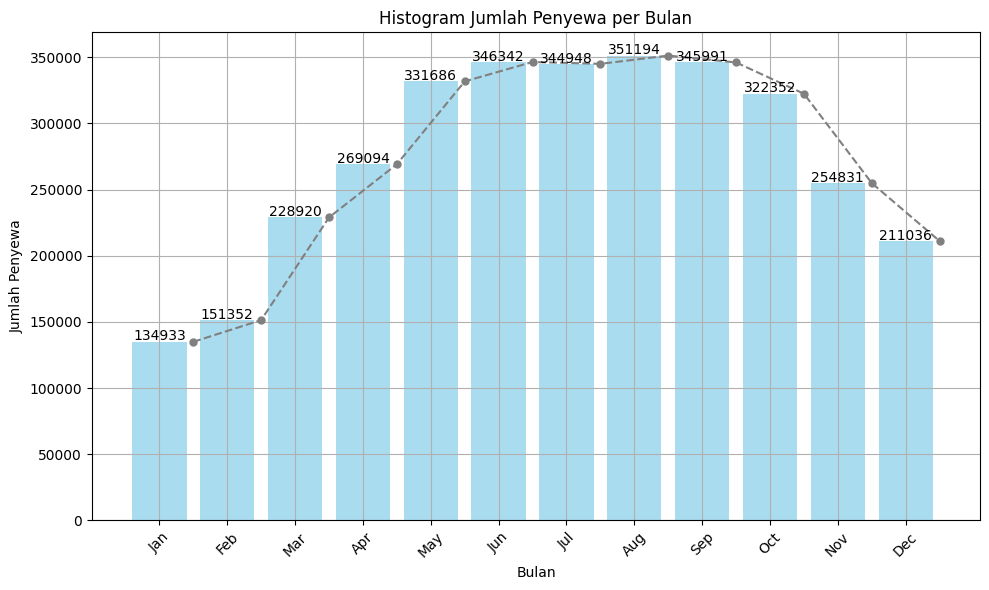

In [126]:
bulan = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sum_val = [134933, 151352, 228920, 269094, 331686, 346342, 344948, 351194, 345991, 322352, 254831, 211036]
plt.figure(figsize=(10, 6))
plt.bar(bulan, sum_val, color='skyblue', alpha=0.7)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewa')
plt.title('Histogram Jumlah Penyewa per Bulan')

for i in range(len(bulan)):
    plt.text(bulan[i], sum_val[i] + 1000, str(sum_val[i]), ha='center')

x = np.arange(len(bulan))
y = sum_val
plt.plot(x + 0.5, y, color='gray', linestyle='--', marker='o', markersize=5)  # Tambahkan 0.5 untuk menyesuaikan posisi garis di antara bar
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Penyewa meningkat dari bulan Januari hingga Mei dan mencapai puncaknya pada bulan Mei, dan kemudian menurun secara bertahap hingga Desember. Dapat di ambil prediksi jika para penyewa mulai untuk bersepedan dan tidak tergantung dengan beberapa alasan. contoh : bisa terjadi dikarenakan hari kerja, hari libur, dan hari biasa ataupun tergantumg musim dan cuaca.  

### Pertanyaan 2:

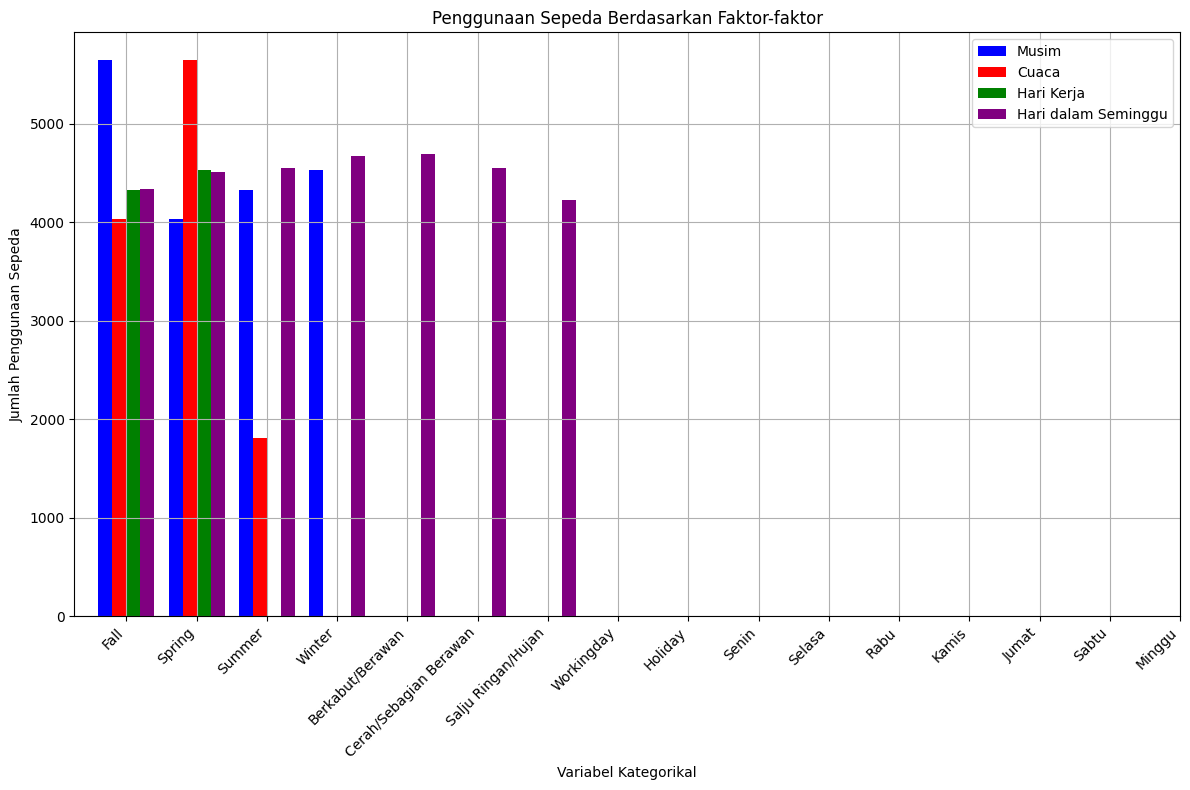

In [141]:
import matplotlib.pyplot as plt

# Data
musim = ['Fall', 'Spring', 'Summer', 'Winter']
mean_ttl_penyewa_musim = [5644.30, 4035.86, 4330.17, 4527.10]

cuaca = ['Berkabut/Berawan', 'Cerah/Sebagian Berawan', 'Salju Ringan/Hujan']
mean_ttl_penyewa_cuaca = [4035.86, 5644.30, 1803.29]

hari_kerja = ['Workingday', 'Holiday']
mean_ttl_penyewa_hari = [4330.17, 4527.10]

hari = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
mean_ttl_penyewa_hari_weekday = [4338.12, 4510.66, 4548.54, 4667.26, 4690.29, 4550.54, 4228.83]

# Plotting
plt.figure(figsize=(12, 8))

plt.bar([x - 0.3 for x in range(len(musim))], mean_ttl_penyewa_musim, width=0.2, color='blue', label='Musim')
plt.bar([x - 0.1 for x in range(len(cuaca))], mean_ttl_penyewa_cuaca, width=0.2, color='red', label='Cuaca')
plt.bar([x + 0.1 for x in range(len(hari_kerja))], mean_ttl_penyewa_hari, width=0.2, color='green', label='Hari Kerja')
plt.bar([x + 0.3 for x in range(len(hari))], mean_ttl_penyewa_hari_weekday, width=0.2, color='purple', label='Hari dalam Seminggu')

plt.xlabel('Variabel Kategorikal')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.title('Penggunaan Sepeda Berdasarkan Faktor-faktor')

# Mengatur label sumbu x agar tidak bertabrakan
plt.xticks(range(len(musim) + len(cuaca) + len(hari_kerja) + len(hari)), musim + cuaca + hari_kerja + hari, rotation=45, ha='right')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Kita dapat melihat faktor-faktor seperti musim, cuaca, hari kerja, dan hari dalam seminggu memengaruhi jumlah penggunaan sepeda. Musim dan Cuaca faktor terbesar dari meningkatnya penyewa sepeda, teteapi cuaca pun menjadi faktor utama menurunnya penyewa sepeda.





## Conclusion

### Conclution pertanyaan 1 :

- Kenaikan: Dari histogram, terlihat bahwa jumlah penyewa cenderung meningkat dari bulan Januari hingga Mei, mencapai puncaknya pada bulan Mei, dan kemudian menurun secara bertahap hingga Desember. Ini bisa mengindikasikan tren musiman di mana permintaan penyewaan meningkat pada musim semi dan kemudian menurun menjelang akhir tahun.

- Bulanan: Beberapa bulan memiliki lonjakan tajam dalam jumlah penyewa, sementara yang lain mungkin memiliki fluktuasi yang lebih stabil.

- Prediksi & Ramalan: Histogram ini memberikan gambaran umum tentang pola perilaku penyewa sepanjang tahun. Informasi ini dapat digunakan untuk merencanakan strategi bisnis seperti penentuan harga, promosi, dan manajemen persediaan untuk mengakomodasi fluktuasi permintaan.


## Exploratory Data Analysis (EDA)

### Conclution pertanyaan 2 :

- Musim: Penggunaan sepeda cenderung lebih tinggi pada musim Fall dan musim dingin Winter, mungkin karena kondisi cuaca yang lebih nyaman dan menjadi bersemangat melakukan aktivitas.

- Cuaca: Cuaca cerah atau sebagian berawan terkait dengan penggunaan sepeda yang lebih tinggi dibandingkan dengan cuaca berkabut atau berawan  dan cuaca salju ringan atau hujan, yang mungkin memengaruhi kenyamanan dan keamanan bersepeda.

- Hari Kerja: Meskipun penggunaan sepeda pada hari libur sedikit lebih tinggi, tidak ada perbedaan yang signifikan antara penggunaan sepeda pada hari kerja dan hari libur.

- Hari dalam Seminggu/weekday: Penggunaan sepeda cenderung lebih tinggi pada akhir pekan dibandingkan dengan hari-hari kerja lainnya, yang mungkin karena orang memiliki lebih banyak waktu luang pada akhir pekan untuk bersepeda.







In [142]:
day.to_csv("day_clean.csv", index=False)
